Saving 2.png to 2 (1).png
Pourcentage d'entraînement : 85.71%
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                86544     
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 86,898
Trainable params: 86,898
Non-trainabl

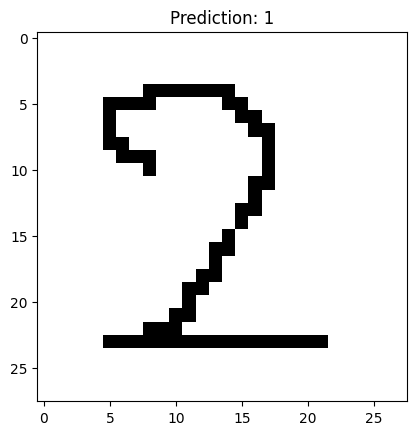

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

# Function to preprocess and predict
def preprocess_and_predict(img_array):
    # Reshape and normalize the image array
    img_array = img_array.reshape(1, 28, 28, 1) / 255.0

    # Make predictions
    predictions = model.predict(img_array)

    # Result
    prediction_class = np.argmax(predictions)
    print("Prediction:", prediction_class)

    # Display the loaded image
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {prediction_class}")
    plt.show()

# Upload image
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
img = image.load_img(file_name, target_size=(28, 28), color_mode="grayscale")

# Convert image to NumPy array
img_array = image.img_to_array(img)

# MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Binary classification: 1 if 2 / 0 otherwise
y_train_binary = (y_train == 2).astype(int)
y_test_binary = (y_test == 2).astype(int)

y_train_binary = to_categorical(y_train_binary, num_classes=2)
y_test_binary = to_categorical(y_test_binary, num_classes=2)

# Result
print(f"Pourcentage d'entraînement : {percentage_training:.2f}%")

# Normalize and reshape the data
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

model.summary()

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(x_train, y_train_binary, epochs=4)

# Using the uploaded image for prediction
preprocess_and_predict(img_array)


In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/sample_data/TpAdd/model.hdf5')